# Регрессия и классификация

## Линейная регрессия

Линейная регрессия и ее расширения — методы предсказания, когда вектор целей является количественным
значением (например, цена дома, возраст).
Подобные модели популярны в силу быстрой обучаемости и возврата очень удобных для интерпретации результатов.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

Простейшая форма линейной регрессионной модели- подбор для данных разделяющей прямой линии(прямолинейная аппроксимация), но такие модели можно распространить на моделирование и более сложного поведения данных.
Прямолинейная аппроксимация представляет собой модель вида y = ax + b, в которой a известна как угловой коэффициент, а b — как точка пересечения с осью координат Y.

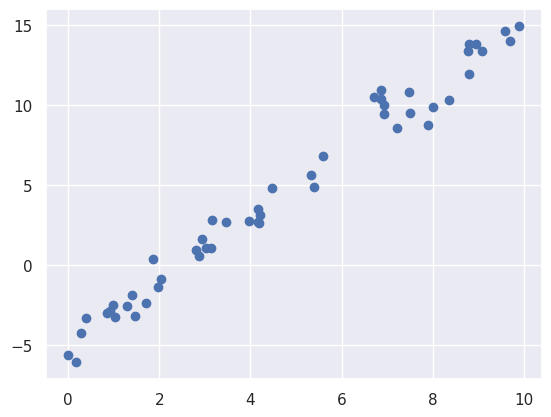

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x -5 + rng.randn(50)
plt.scatter(x, y)

Воспользуемся оценивателем LinearRegression из библиотеки Scikit-Learn для обучения на этих данных и поиска оптимальной прямой

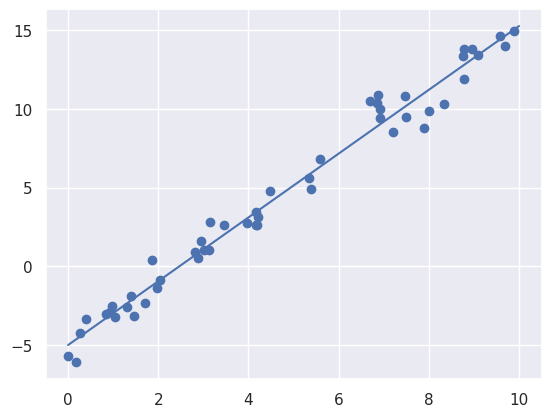

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

Обучаемые параметры модели (в библиотеке Scikit-Learn всегда содержат в конце знак подчеркивания) включают угловой коэффициент и точку пересечения с осью координат. В данном случае соответствующие параметры — coef_и intercept_

In [4]:
print("Угловой коэффициент: ", model.coef_[0])
print("Точка пересечения  с осью координат:", model.intercept_)

Угловой коэффициент:  2.0272088103606953
Точка пересечения  с осью координат: -4.998577085553204


Возможности оценивателя LinearRegression намного шире этого: помимо аппроксимации прямыми линиями, он может также работать с многомерными
линейными моделями вида:
y = a0 + a1x1+a2x2+… с несколькими величинами x.
Геометрически это подобно подбору плоскости для точек в трех измерениях или гиперплоскости для точек в пространстве с еще большим числом измерений.

## Полиномиальные базисные функции

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

После такого преобразования можно воспользоваться линейной моделью для подбора намного более сложных зависимостей между величинами x и y.

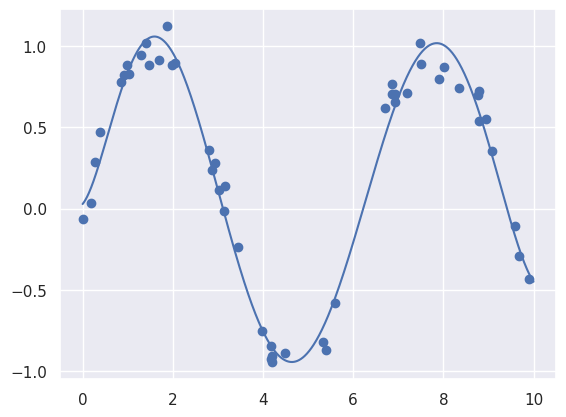

In [6]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50) #зашумленная синусоида
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

## Регуляризация

Применение базисных функций в линейной модели делает ее намного гибче, но также и быстро приводит к переобучению.
Например, если выбрать слишком много базисных функций, мы в итоге получим не слишком хорошие результаты. Модель будет переобученной

### Гребневая регрессия (L2 -регуляризация)

Самый популярный вид регуляризации — гребневая регрессия (ridge regression), или L2-регуляризация, также иногда называемая регуляризацией Тихонова (Tikhonov regularization).
Она заключается в наложении штрафа на сумму квадратов (евклидовой нормы) коэффициентов модели.
Этот тип модели со штрафом встроен в библиотеку Scikit-Learn в виде оценивателя Ridge

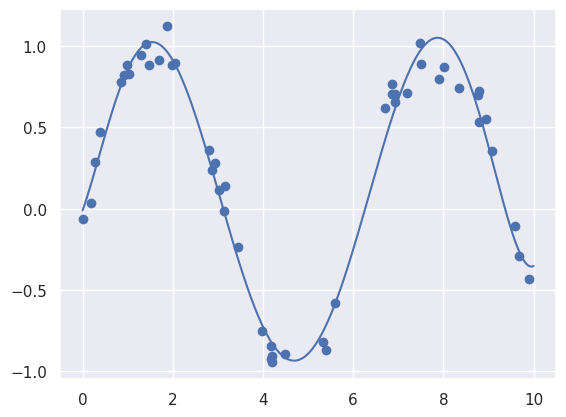

In [7]:
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(7), Ridge(alpha=0.1)) # Гребневая регрессия
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))


Параметр $\alpha$ служит для управления сложностью получаемой в итоге модели.
В предельном случае $\alpha$ → 0 мы получаем результат, соответствующий стандартной линейной регрессии;
В предельном случае $\alpha$ → $\infty$ будет происходить подавление любого отклика модели.

### Лассо-регуляризация (L1 )

Этот тип регуляризации  включает штрафование на сумму абсолютных значений (L1-норма)коэффициентов регрессии.
Хотя концептуально эта регрессия очень близка к гребневой, результаты их могут очень сильно различаться.
Например, по геометрическим причинам лассо-регрессия любит разреженные модели, то есть она по возможности делает коэффициенты
модели равными нулю.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.826e+00, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


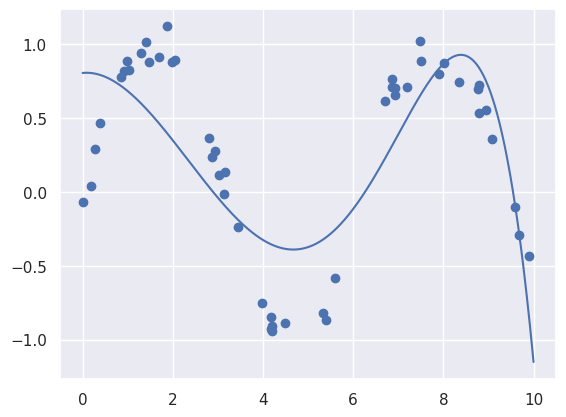

In [8]:
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(7), Lasso(alpha=0.001)) # Лассо-регуляризация
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

При использовании штрафа лассо-регрессии большинство коэффициентов в точности равны нулю, а функциональное поведение моделируется небольшим подмножеством из имеющихся базисных функций.

## Пример решения задачи регрессии для датасета

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [10]:
wine_data = load_wine()
X = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
y = wine_data['target']

In [11]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

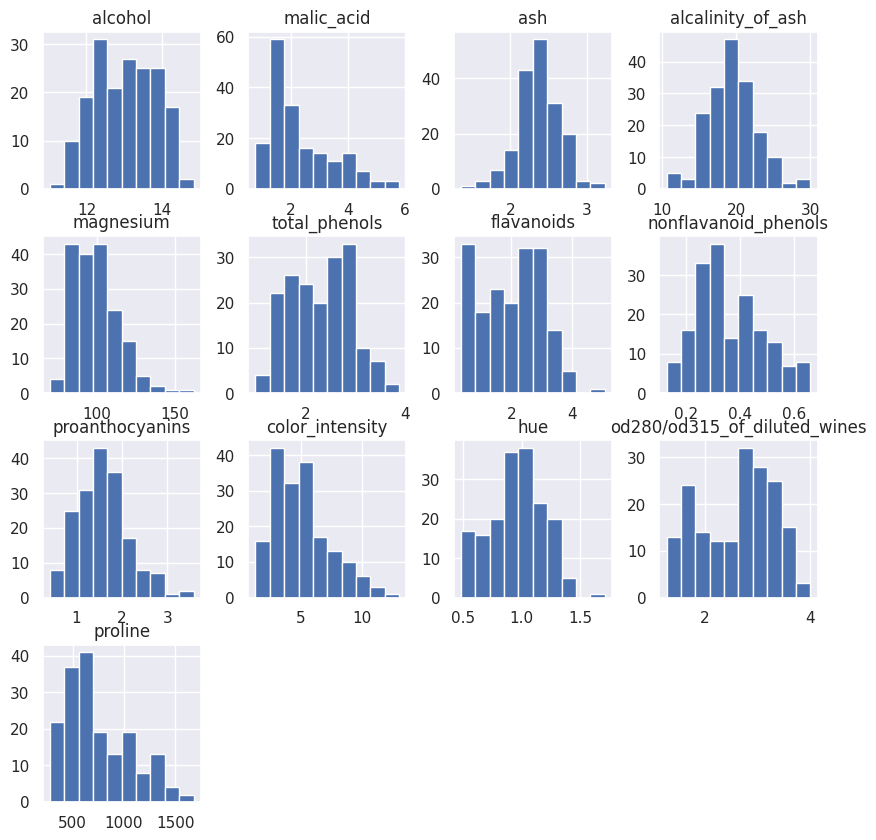

In [12]:
X.hist(X.columns, figsize=(10, 10))

<Axes: >

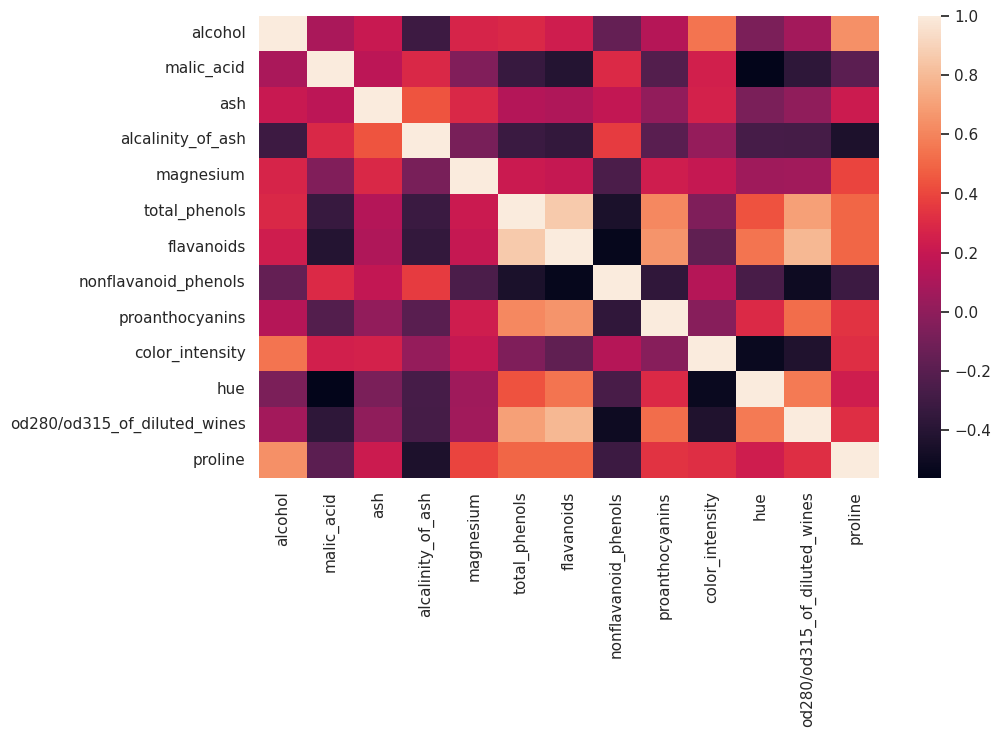

In [13]:
plt.figure(figsize = (10,6))
sns.heatmap(X.corr())

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=99, stratify=y
)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)

print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))
print('coef: ',regressor.coef_)

test mse:  0.06962900442881435
r2 score:  0.8854832617515946
coef:  [-0.08429519  0.03148265 -0.02639522  0.12131381 -0.02269847  0.10529297
 -0.35593223 -0.036753    0.02885449  0.17719586 -0.03740377 -0.18503377
 -0.27013274]


# Классификация

## Наивный гауссовский классификатор

Наивные байесовские классификаторы основаны на байесовских методах классификации, в основе которых лежит теорема Байеса — уравнение, описывающее
связь условных вероятностей статистических величин. В байесовской классификации нас интересует поиск вероятности метки (категории) при определенных заданных признаках, являющихся результатами наблюдений/экспериментов величин.

В  наивном гауссовском классификаторе мы принимаем допущение, что правдоподобие признаковых значений х при условии, что наблюдение принадлежит классу у, подчиняется нормальному распределению.

In [17]:
# Загрузить библиотеки
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
# Загрузить данные
wine = datasets.load_wine()
features = wine.data
target = wine.target
# Создать объект наивного гауссовского классификатора
clf = GaussianNB()
# Натренировать модель
model = clf.fit(features, target)
print(clf.predict(features[2:3]))


[0]


В библиотеке scikit-learn мы тренируем Наивный гауссовский классификатор, используя метод fit, и, в свою очередь, можем делать предсказания
о классе наблюдения

In [18]:
# Создать новое наблюдение
new_observation = [[ 4, 4, 4, 0.4,4,4,4,4,0.4,0.4,4,4,4]]

Делаем предсказание о классе наблюдений

In [19]:
# Предсказать класс
model.predict(new_observation)

array([1])

In [20]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

Правильность на тестовом наборе: 0.99


In [21]:
# Создать объект наивного  гауссового классификатора с априорными вероятностями для каждого класса
сlf = GaussianNB(priors=[0.25, 0.25, 0.5])
# Обучить модель
model = clf.fit(features, target)
print(clf.predict(features[2:3]))

[0]


для дискретных и счетных признаков будем использовать полиномиальный наивный байесов классификатор

In [22]:
# Загрузить библиотеки
import numpy as np
from sklearn.naive_bayes import MultinomialNB
# Загрузить данные
wine = datasets.load_wine()
features = wine.data
target = wine.target
# Создать объект полиномиального наивного байесова классификатора  с априорными вероятностями каждого класса
clf = MultinomialNB()
# Натренировать модель
model = clf.fit(features, target)

В классе MuitinoniaiNB модели тренируются с использованием метода fit, а наблюдения можно предсказать с помощью метода predict

In [23]:
# Создать новое наблюдение
new_observation = [[4, 4, 4, 0.4, 4, 4, 4, 4, 0.4, 0.4, 4, 4, 4]]

In [24]:
# Предсказать класс нового наблюдения
model.predict(new_observation)

array([1])

In [25]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

Правильность на тестовом наборе: 0.87


Если параметр ciass_prior не задан, то априорные вероятности заучиваются на основе данных.
Если мы хотим, чтобы в качестве априорного распределения использовалась равномерное, то можно задать fit_prior=False.
Класс MuitinomiaiNB содержит гиперпараметр аддитивного сглаживания alpha, который должен быть настроен.
Значение по умолчанию равняется 1.0, при этом значение о.о означает отсутствие сглаживания.

Бернуллиев наивный байесов классификатор или наивный байесова классификатор для бинарных признаков


Принимаем допущение, что все наши признаки являются бинарными, т. е. принимают только два значения.
Кроме того, класс BernoulliNB имеет гиперпараметр аддитивного сглаживания alpha, который требуется настроить с помощью методов отбора модели. Наконец, если необходимо использовать априорные вероятности, то можно применить параметр class prior со списком, содержащим априорные
вероятности для каждого класса. Если требуется указать равномерную априорную
вероятности, то его можно указать  fit_prior=False

In [26]:
# Загрузить библиотеки
import numpy as np
from sklearn.naive_bayes import BernoulliNB
# Создать три бинарных признака
features = np.random.randint(2, size=(100, 3))
# Создать вектор бинарных целей
target = np.random.randint(2, size=(100, 1)).ravel()
# Создать объект бернуллиева наивного Байеса с априорными вероятностями каждого класса
clf = BernoulliNB(class_prior=[0.25, 0.5])
# Натренировать модель
model = clf.fit(features, target)

In [27]:
# Создать новое наблюдение
new_observation = [[0, 0, 1]]

In [28]:
# Предсказать класс нового наблюдения
model.predict(new_observation)

array([1])

In [29]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

Правильность на тестовом наборе: 0.50


## Классификатор k ближайших соседей

В простейшем варианте алгоритм k ближайших соседей рассматривает лишь одного ближайшего соседа – точку обучающего набора, ближе всего расположенную к точке, для которой мы хотим получить прогноз.
Прогнозом является ответ, уже известный для данной точки обучающего набора.

In [30]:
#Загружаем данные
from sklearn.datasets import load_iris
iris_dataset = load_iris()

В библиотеке scikit-learn есть функция train_test_split, которая перемешивает набор данных и разбивает его на две части. Эта функция отбирает в обучающий набор 75% строк данных с соответствующими метками. Оставшиеся 25% данных с метками объявляются тестовым набором.

Для наших данных зададим обучающие данные, обучающие метки, тестовые данные, тестовые метки

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( iris_dataset['data'], iris_dataset['target'], random_state=0)

Алгоритм классификации на основе метода k ближайших соседей реализован в классификаторе KNeighborsClassifier модуля neighbors. Прежде чем использовать эту модель, нам нужно создать объект-экземпляр класса.
Это произойдет, когда мы зададим параметры модели. Самым важным параметром KNeighborsClassifier является количество соседей, которые мы установим равным 1

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

Для построения модели на обучающем наборе, мы вызываем метод fit объекта knn, который принимает в качестве аргументов массив
NumPy X_train, содержащий обучающие данные, и массив NumPy y_train, соответствующий обучающим меткам:

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Представим, что мы нашли в дикой природе ирис с длиной чашелистика 5 см, шириной чашелистика 2.9 см, длиной лепестка 1 см и шириной лепестка 0.2 см. К какому сорту ириса нужно отнести этот цветок
Мы можем поместить эти данные в массив NumPy, снова вычисляя форму массива, т.е. количество примеров (1), умноженное на количество признаков (4):

In [34]:
#Занесем параметры найденного цветка в массив
X_new = np.array([[5, 2.9, 1, 0.2]])
print("форма массива X_new: {}".format(X_new.shape))
#Делаем прогноз
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозированная метка: {}".format( iris_dataset['target_names'][prediction]))

форма массива X_new: (1, 4)
Прогноз: [0]
Спрогнозированная метка: ['setosa']


In [35]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


# Логистическая регрессия

In [36]:
from sklearn. linear_model import LogisticRegression
from sklearn import metrics

In [37]:
data = pd.read_csv ('example.csv')
data.head()

FileNotFoundError: ignored

In [ ]:
data.shape

In [ ]:
X = data[['student', 'balance', 'income']]
y = data['default']

X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3,random_state=0)

In [ ]:
#Создаём модель логистической регрессии
log_regression = LogisticRegression()

# Обучаем модель
log_regression. fit (X_train,y_train)

# Используем модель для предсказаний
y_pred = log_regression. predict (X_test)


In [ ]:
cnf_matrix = metrics. confusion_matrix (y_test, y_pred)
cnf_matrix

In [ ]:
print("Точность:",metrics. accuracy_score (y_test, y_pred))

In [ ]:
# Определяем метрики
y_pred_proba = log_regression. predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics. roc_curve (y_test, y_pred_proba)
auc = metrics. roc_auc_score (y_test, y_pred_proba)

# Строим ROC-кривую
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()


# Задание

## Регрессия

a. Постройте линейную регрессию для заданного набора данных. Варианты заданий:
   1. exam_регр.csv
   1. cars.csv
   1. bikes_rent.csv
   1. garments_worker_productivity.csv
   1. Salary.csv
   1. Salary Data.csv
   1. winequality-red.csv
   1. уровень шума.csv
   1. Concrete_Data.xls
   1. зар. плата.xls
   1. продажа автомобилей (из объявлений).xls
   1. ПРОДАЖИ.xls
   1. AirQualityUCI.xlsx
   1. Nedvig.xlsx
   1. Real estate valuation data set.xlsx
   
b. Проверьте и оцените точность построенной модели

c. Постройте графики модели в координатах целевой переменной и любых двух факторов

## Классификация

a. Решите задачу классификации для заданных наборов данных методами k-ближайших соседей, наивного байесовского классификатора, логистической регрессии. Варианты заданий:
   1. horse.csv (outcome)
   1. winequality-red.csv (quality)
   1. winequality-white.csv (quality)
   1. выгорание.zip (attrition)
   1. adult.data.csv (salary)
   1. Response_кл.csv
   1. telecom_churn.csv (Churn)
   1. Visualizations_кл.csv
   1. hepatitis.txt
   1. классификация грибов( съедобные-несъедобные).xls
   1. diabetes.xlsx
   1. Nedvig_класс.xlsx

b. Проверьте и оцените точность модели. Обоснуйте выбранные механизмы оценки (метрики, спомоб оценки, результат)

c. Постройте график с объектами и разделяющей поверхностью для любой пары признаков